# Mnist lab 

## Option 1: Using standard python libraries and using the csv dataset
## Option 2: Using tensorflow + keras (to review)

## Option 1: 
### Set the environment
1. Create the working directory called "sciencedonnees" based on the user's home
2. Download the mnist dataset in csv format.  it is also possible to download the original dataset from http://yann.lecun.com/exdb/mnist/ (gz files), decompress the files and then (a) convert the files to csv or (b) convert the files to a numpy array  

In [10]:
import urllib.request
import os
import csv

In [11]:
def set_environment(workpath, urls, files):
    ''' function to set the working directory, if it does not exist, 
        it will create it, and download the dataset'''
    if not os.path.exists(workpath):
        os.makedirs(workpath)
        
    for key, value in files.items():
        file_name = workpath+value
        print ('Downloading file: %s to %s %s' % (urls[key], file_name, '\n'))
        if os.path.isfile(file_name):
            print ('Skipping as %s already exist in %s %s' % (value, file_name, '\n') )
        else:
            download_file(urls[key], workpath+value)
            print ('done'+'\n')
    
        
def download_file(f_url,f_dest):
    '''function to download any file'''
    urllib.request.urlretrieve(f_url, f_dest)

#### If we want to use the original dataset, we can do it be defining the urls and files dictionaries as follows:

```python
urls={'train_images':'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
      'train_labels':'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
      'test_images':'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
      'test_labels':'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'}

files = {'train_images':'train-images-idx3-ubyte.gz',
         'train_labels':'train-labels-idx1-ubyte.gz',
         'test_images':'t10k-images-idx3-ubyte.gz',
         'test_labels':'t10k-labels-idx1-ubyte.gz'}
```

In [12]:
HOMEPATH = os.path.expanduser('~')
workpath = HOMEPATH+'/sciencedonnees/'
urls = {'train':'https://pjreddie.com/media/files/mnist_train.csv', 
        'test':'https://pjreddie.com/media/files/mnist_test.csv'}

files = {'train':'mnist_train.csv', 'test':'mnist_test.csv'}

set_environment(workpath, urls, files)


Skipping as mnist_train.csv already exist in C:\Users\charl/sciencedonnees/mnist_train.csv 


Skipping as mnist_test.csv already exist in C:\Users\charl/sciencedonnees/mnist_test.csv 



### get the train and test dataset as we need it

In [13]:
def get_dataset(ds_file):
    '''Open train and test datasets, read them and, store their records to a list'''
    with open (ds_file, 'r') as t_file:
        ds = csv.reader(t_file)
        records = []
        label = []
        dataset = []
        for line in ds:
            records.append([int(i) for i in line]) # list comprehension to convert lists' strings to ints on the fly        
        # separate col(0) - label from the rest of the list
        for line in records:
            label.append(line[0])
        for line in records:
            dataset.append(line[1:])
    return records,label,dataset

In [65]:
# get our datasets
raw_train_ds, train_labels, train_data = get_dataset(workpath+files['train'])
raw_test_ds, test_labels, test_data = get_dataset(workpath+files['test'])

print (raw_train_ds[0])
#print (train_labels[0])

[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253, 90, 

## Dataset test:  
1. Print the first 3 labels
2. Plot the first 3 entries in the training set to validate they match the labels

Label = 5


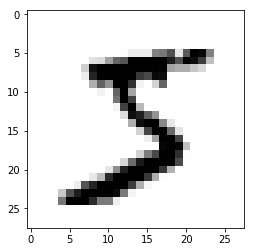

Label = 0


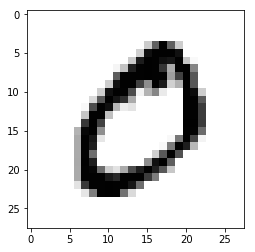

Label = 4


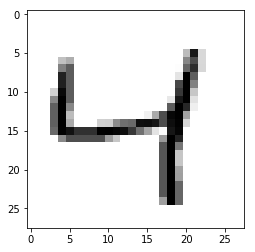

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#reshape gives a new shape to an array without changing its data.
for i in range(0,3):
    trainsetmtx = np.reshape(train_data[i], (28,28))
    imgplot = plt.imshow(trainsetmtx, cmap=plt.cm.get_cmap("gray_r"))
    print ('Label = %s' % train_labels[i]), plt.show()

**Proposed notion of similarity

We have to define our own measure of similarity, and compare its performance to the provided measures.

In [16]:
pwd

'C:\\Users\\charl\\OneDrive\\CS materials\\GitHub ressources\\sciencedonnees\\MNIST'

In [17]:
#Define original similarity measure
import dist_norm

# K-Mean

In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn import neighbors, metrics
from sklearn.cluster import KMeans

# Binary partition

# PCoA

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import time

from sklearn.manifold import MDS
from matplotlib import offsetbox


In [19]:
# convert datasets to Numpy objects
y_train = np.asarray(train_labels)
X_train = np.asarray(train_data) 
y_test = np.asarray(test_labels) 
X_test = np.asarray(test_data)

In [40]:

n_batches = 200 # size of batch

#Distance matrix
D = dist_norm.dist_norm.norm_distance(X_train[:n_batches,:])

Processing...
Processing has completed!19900.


[386980713.53274167, 186021879.30015469, 108001544.07884368, 72461781.560462832, 52998205.26217483, 40840530.835693188, 33170314.071949381, 27855692.390449584, 23880333.423626717, 20783207.751822378, 18181321.739305757, 16459960.280437203, 14793915.160039131, 13452976.106104936, 12175359.832659965, 11178684.854557224, 10327328.511774639, 9537869.1901555117, 8865165.4561969154, 8304796.7863280866, 7780217.0274668401, 7280457.3050432205, 6894549.2120208917, 6494005.6168799093, 6127805.8809530782, 5795614.6168512199, 5565530.4553680308, 5228091.5209536562, 4980014.8734703474, 4801866.7614031173, 4542770.8245456247, 4392750.2178925071, 4177074.6198510402, 4038497.8196175988, 3823300.7751047323, 3716100.567841412, 3576937.9139908794, 3435593.4763678825, 3314645.2331179259, 3176609.1895509306, 3083942.3149471362, 2980237.4915261269, 2880696.3394842814, 2773367.0689399289, 2704658.5296146134, 2602175.8633835884, 2517233.6602584347, 2442619.6659067869, 2371056.9604965136, 2295798.6862700828, 2

Text(0,0.5,'stress')

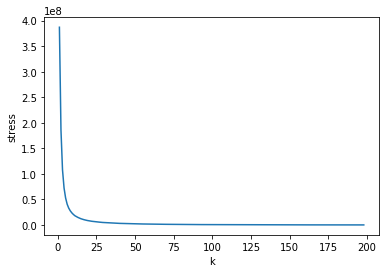

In [49]:
#optimal number of components
k_range = range(1, min(700, D.shape[0]-1))
stress = [MDS(dissimilarity='precomputed', n_components=k,
            random_state=42, max_iter=300, eps=1e-9).fit(D).stress_ for k in k_range]
print(stress)
plt.plot(k_range, stress)
plt.xlabel("k")
plt.ylabel("stress")

#print("K = %f" %arg_min(stress[k]))
# n_comp = 10

In [70]:
n_comp = 25 # optimal number of components


In [94]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        print(shown_images)
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        


Error with normaliz_dist: 8386067
[[ 1.  1.]]


ValueError: operands could not be broadcast together with shapes (25,) (1,2) 

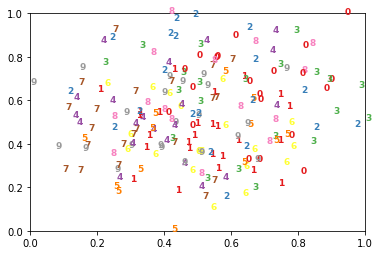

In [95]:
y = y_train
pcoa_norm = MDS(dissimilarity = 'precomputed', n_components=n_comp, n_init=3, max_iter=100)
X_transf_norm = pcoa_norm.fit_transform(D,y_train[:n_batches])

print("Error with normaliz_dist: %d" %pcoa_norm.stress_)

plot_embedding(X_transf_norm,"NORMALIZED - MDS embedding of the digits (time %.2fs)" ) #%(time() - t0)



In [73]:
X_transf_norm.shape

(200, 25)

Error with eucl_distance: 201850579


ValueError: operands could not be broadcast together with shapes (25,) (1,2) 

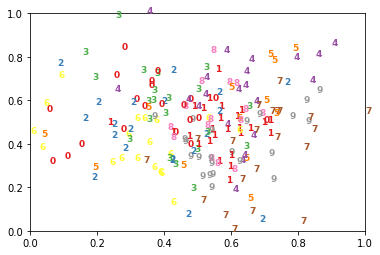

In [74]:
pcoa_eucl = MDS(dissimilarity = 'euclidean', n_components=n_comp)
X_transf_eucl = pcoa_eucl.fit_transform(X_train[:n_batches,:],y_train[:n_batches])
print("Error with eucl_distance: %d" %pcoa_eucl.stress_)
plot_embedding(X_transf_eucl,"EUCLIDE - MDS embedding of the digits (time %.2fs)" ) #%(time() - t0)


In [ ]:
# Arbitrary choice of K=2 components
from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', n_components=2, random_state=40, max_˓→iter=3000, eps=1e-9)
X = mds.fit_transform(D)

# Isomap

In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap
from sklearn import manifold

# KNN

In [ ]:
#http://scikit-learn.org/stable/modules/neighbors.html
from sklearn.neighbors import NearestNeighbors